Linear Fitting with SciKit Learn
=========================

<div class="overview">
   <p class="overview-title">Overview</p>
    <p>Questions</p>
        <ul>
            <li>How can I fit a linear equation using scikitlearn?</li>
            <li>How can I fit a linear equation with multiple variables using scikitlearn?</li>
        </ul>
    <p>Objectives:</p>
        <ul>
            <li>Slice a pandas dataframe to get `X` and `Y` values and convert them to NumPy Arrays.</li>
            <li>Use the `LinearRegression` model in scikitlearn to perform a linear fit.</li>
        </ul>
    <p>Keypoints:</p>
        <ul>
            <li>You must import and create the model you want to use from scikitlearn.</li>
            <li>SciKitLearn models require `X` and `Y` values that are at least two dimensional.</li>
            <li>Use `.reshape` on your NumPy arrays to make sure they are the correct dimension.</li>
            <li>Fit SciKitLearn models by giving them data and using the `fit` method.</li>
            <li>Use the `predict` method after fitting to make predictions</li>
        </ul>
    </div>

In this lesson, we are going to use the [scikitlearn](https://scikit-learn.org/) library to do a linear fit. When it comes to fitting equations in Python, you will encounter a lot of options. In this workshop, we will work with the library scikitlearn, and later the library statsmodels.

Another library you might encounter when doing fitting is [scipy](https://www.scipy.org/). While functionalities available from theses libraries can be similar in some cases, each has different strengths. Scipy is used for scientific applications. Statsmodels provides rigourous statics while scipy has a lot of functionalities around science and engineering applications. SciKitLearn, which we use in this section, is geared toward machine learning.

For this lesson, we will just be doing linear fits. However, scikitlearrn has many different models built in, some of which we will see in the next session. SciKitLearn might not be the easiest library to use for analysis depending on your use case. However, we start with it here so we can better understand how to use the library for more complicated examples and models. [API of scikitlearn](https://scikit-learn.org/stable/developers/develop.html)

In [1]:
ls data

PubChemElements_all.csv  potts_table1.csv         potts_table2.csv
delaney-processed.csv    potts_table1_clean.csv   rxnpredict/


We start by reading in the data we worked to clean during the last session. We named this file `potts_table1_clean.csv`. Now that the data is clean, we should expect that it will load correctly with correct data types, and that we shouldn't have too many problems working with it.

In [2]:
import os
import pandas as pd

In [3]:
path = os.path.join("data", "potts_table1_clean.csv")
df = pd.read_csv(path)

In [4]:
df.head()

,Compound,log P,pi,Hd,Ha,MV,R_2,log K_oct,log K_hex,log K_hep
0,water,-6.85,0.45,0.82,0.35,10.6,0.00,-1.38,NaN,NaN
1,methanol,-6.68,0.44,0.43,0.47,21.7,0.28,-0.73,-2.42,-2.80
2,methanoicacid,-7.08,0.60,0.75,0.38,22.3,0.30,-0.54,-3.93,-3.63
3,ethanol,-6.66,0.42,0.37,0.48,31.9,0.25,-0.32,-2.24,-2.10
4,ethanoicacid,-7.01,0.65,0.61,0.45,33.4,0.27,-0.31,-3.28,-2.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Compound   37 non-null     object 
 1   log P      34 non-null     float64
 2   pi         37 non-null     float64
 3   Hd         37 non-null     float64
 4   Ha         37 non-null     float64
 5   MV         36 non-null     float64
 6   R_2        37 non-null     float64
 7   log K_oct  36 non-null     float64
 8   log K_hex  30 non-null     float64
 9   log K_hep  24 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.0+ KB


## Linear Regression using SciKitLearn

SciKitLearn has a number of [linear models](https://scikit-learn.org/stable/modules/classes.html?highlight=linear_model#module-sklearn.linear_model) available. The purpose of this workshop is not to cover what linear models exist or in what context to use them. Rather, we are covering how to use these models in Python. We will do a simple linear fit using the ordinary least squares method.

### Preparing Data for Fitting with SciKitLearn

Before we do the fit, we will need to make sure our data is ready. Although this data is clean, we still have some missing `NaN` values. In the paper, the authors perform a multiple linear regression, meaning that they fit a line based on many variables. We will do this, but we will first fit a simple linear model with one variable.

From our initial exploration with seaborn, we are going to decide to fit `log P` as a function of `MV`. SciKitLearn Models are going to require us to pass NumPy arrays to them as data. When we do this fit, it is also necessary to drop any values which are `NaN`. 

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>Prepare a dataframe which can be used for fitting. One approach to this would be to first slice the dataframe to have only the columns of interest, then to use `dropna` on the dataframe to drop the uneeded rows. Save your prepared data in a variable called `fit_data`.</p>
    
    
```{admonition} Solution
:class: dropdown

```python
fit_data = df[["log P", "MV"]]
fit_data = fit_data.dropna(axis=0, how="any")
``` 
</div>

In [6]:
fit_data = df[["log P", "MV"]]
fit_data = fit_data.dropna(axis=0, how="any")

fit_data.head()

,log P,MV
0,-6.85,10.6
1,-6.68,21.7
2,-7.08,22.3
3,-6.66,31.9
4,-7.01,33.4


```{note}

We could have alternatively used the `dropna` function on the original dataframe with an additional argument of `subset` which says to only consider our two columns of interest. Then, we would have had a dataframe called `fit_data` which retained all of the columns, but had a value for every cell in both the `log P` and `MV` columns.

```python
fit_data = df.dropna(subset=["log P", "MV"], how="any")
```


```{admonition} When to use dropna
:class: tip
It is important that when you use `dropna` on data you intend to fit that this is done at the same time with the argument `how=any`. This is because it is imperative that the values of X and Y match with one another and are of the same length.
```


In [7]:
X = fit_data["MV"].to_numpy()
Y = fit_data["log P"].to_numpy()


### SciKitLearn Models

Now that we have prepared our X and Y variables, let's see how we would do a fit using scikitlearn.

Typically when doing fitting with scikitlearn, the first thing you will do is to import the type of model you want to use. In our case, we are importing a `LinearRegression` model. This type of model performs ordinary least squares fitting. You will first import the model, then you will create a model object. After creation, you will give data to the model and tell it to perform a fit. Your model can then be used to make predictions.

In [8]:
from sklearn.linear_model import LinearRegression

Now that you have imported the model, you can read more about it either on the [SciKitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) website, or by using the built-in Python `help` function.

In [9]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

Before we do the fit, we first create the model. When we create this model, we specify settings for it such as if we want the linear model to have an intercept. It will have one by default, but if you wanted to do an ordinary least squares fit without an intercept, you would specify it when you create the model.

After we create the model, we give it data and call the `fit` function. Then, the model will contain information about coefficients and an intercept.

We will fit an equation for `log P` based on some other variable in the data frame. we have to get our data as numpy arrays. 

Next, we will create the linear model using `LinearRegression()`.

To perform the fit, we do use the `fit` function on the linear model we created. As we have it now, it will not quite work. The error message is shown below for discussion.

In [10]:
linear_model = LinearRegression()
linear_model.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 10.6  21.7  22.3  31.9  33.4  42.2  43.6  49.4  52.   52.4  53.9  60.
  60.2  62.6  64.   64.1  66.   66.   67.6  67.6  70.   71.   71.   72.3
  72.9  74.3  79.5  83.1  84.6  93.3  94.8 104.  114. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

It is at this point that the array's **shape** becomes important. Typically if you print the shape of a pandas Series or a one dimensional slice of a NumPy array, you will see something like `(n, )`. For example,

In [11]:
X.shape

(33,)

This array is one dimensional, mean that its shape is specified with only one number. You can sort of think of this as a vector. Even though the shape would not seem different with a shape of `(33, 1)`, it is necessary for fitting with scikitlearn.

You will see that scikitlearn even tells us this in the error function.

```Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.```

In NumPy, when we use a `-1` in a dimension it basically translates into whatever number is required in order for the array to have the other specified dimensions. Otherwise, we would have to specify the number of rows for each reshape command. We don't really know or care about the number of rows, what's important for us in that the data be in a single column. 

In [12]:
X = X.reshape(-1, 1)

In [13]:
X.shape

(33, 1)

In [14]:
Y = Y.reshape(-1, 1)

In [15]:
linear_model.fit(X, Y)

LinearRegression()

The `linear_model` variable now contains our linear fit. We can check our fit coefficient and intercept.

In [16]:
print(f"The intercept is {linear_model.coef_} and the intercept is {linear_model.intercept_}.")

The intercept is [[0.02705618]] and the intercept is [-7.24687081].


<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>Perform a second linear fit for `logP` vs `pi`. Save your variables as `X_pi`, `Y_pi`, and `linear_pi`.</p>
    
    
```{admonition} Solution
:class: dropdown

```python
fit_data_pi = df.dropna(subset=["log P", "pi"], how="any")

linear_pi = LinearRegression()

X_pi = fit_data_pi["pi"].to_numpy().reshape(-1, 1)
Y_pi = fit_data_pi["log P"].to_numpy().reshape(-1, 1)

linear_pi.fit(X_pi, Y_pi)

print(f"The intercept is {linear_pi.coef_} and the intercept is {linear_pi.intercept_}.")
``` 
</div>

In [17]:
fit_data_pi = df.dropna(subset=["log P", "pi"], how="any")

linear_pi = LinearRegression()

X_pi = fit_data_pi["pi"].to_numpy().reshape(-1, 1)
Y_pi = fit_data_pi["log P"].to_numpy().reshape(-1, 1)

linear_pi.fit(X_pi, Y_pi)

print(f"The intercept is {linear_pi.coef_} and the intercept is {linear_pi.intercept_}.")

The intercept is [[0.06416467]] and the intercept is [-5.59119251].


We might next be interested in how good these fits are, or fit metrics. We might evaluate that using an `R2` value. In scikitlearn for the linear model, this is accessible through `model.score`.

In [18]:
r2 = linear_model.score(X, Y)

In [19]:
print(f"The r2 score for log P vs MV is {r2}")

The r2 score for log P vs MV is 0.4462290155325287


In [20]:
r2_pi = linear_pi.score(X_pi, Y_pi)

In [21]:
print(f"The r2 score for log P vs pi is {r2_pi}")

The r2 score for log P vs pi is 0.000529506196607854


### Making Predictions

In [22]:
fit_data["model_prediction"] = linear_model.predict(X)

fit_data.head()

,log P,MV,model_prediction
0,-6.85,10.6,-6.960075
1,-6.68,21.7,-6.659752
2,-7.08,22.3,-6.643518
3,-6.66,31.9,-6.383779
4,-7.01,33.4,-6.343195


<IPython.core.display.Javascript object>


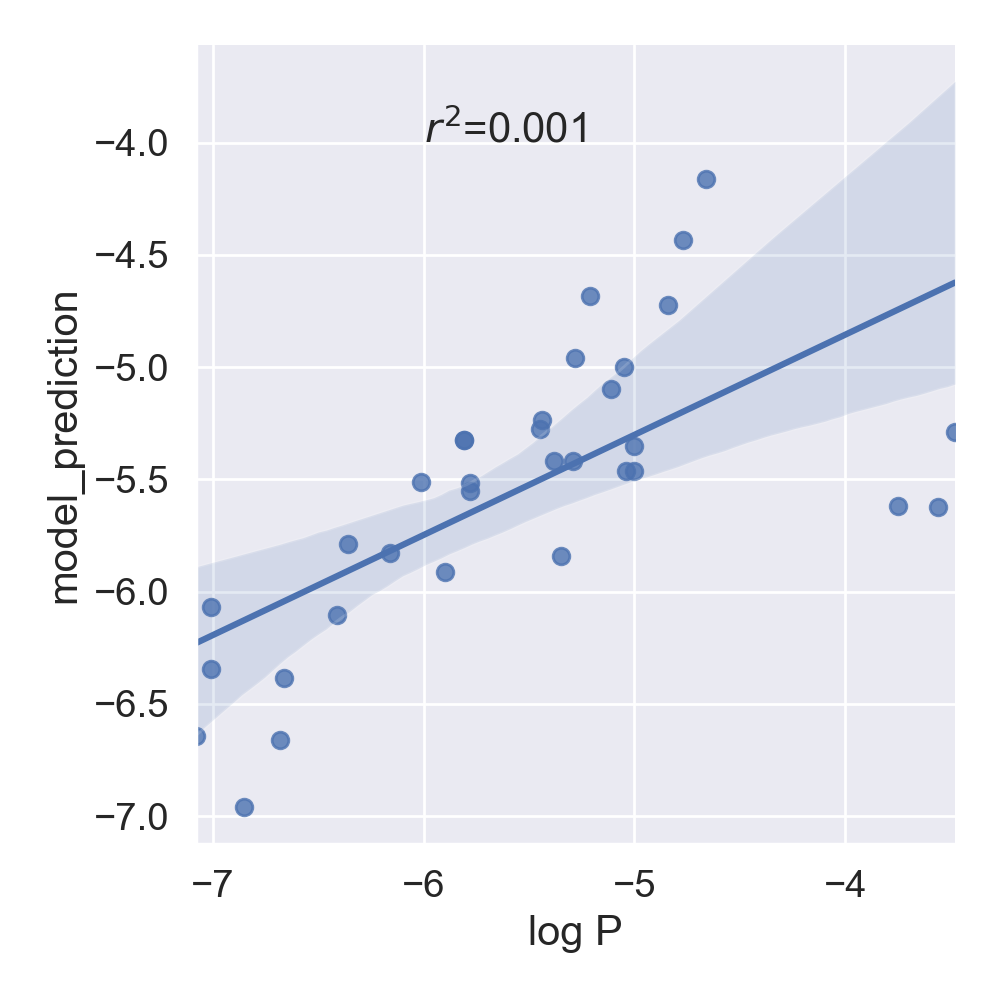

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

sns.set_theme(font_scale=1.25)
g = sns.lmplot(x="log P", y="model_prediction", data=fit_data)
g.ax.annotate(rf"$r^2$={r2_pi:.3f}", xy=(-6, -4))
g.tight_layout()

In [26]:
import numpy as np

# Predict for single made up value
linear_model.predict(np.array([0.75]).reshape(1, -1))

array([[-7.22657868]])

## Multiple Linear Regression

In [51]:
fit_data = df[["log P", "MV", "pi", "Ha", "Hd", "R_2"]].copy()
fit_data.head()

,log P,MV,pi,Ha,Hd,R_2
0,-6.85,10.6,0.45,0.35,0.82,0.00
1,-6.68,21.7,0.44,0.47,0.43,0.28
2,-7.08,22.3,0.60,0.38,0.75,0.30
3,-6.66,31.9,0.42,0.48,0.37,0.25
4,-7.01,33.4,0.65,0.45,0.61,0.27


In [52]:
fit_data.dropna(axis=0, inplace=True)

In [53]:
X = fit_data[["MV", "pi", "Ha", "Hd", "R_2"]].to_numpy()
Y = fit_data["log P"].to_numpy()

In [54]:
multiple_reg = LinearRegression().fit(X, Y)

In [55]:
print(multiple_reg.coef_)
print(multiple_reg.intercept_)

[ 0.02598616 -0.93187432 -4.37563319 -1.30374738  0.51352483]
-4.486102127117395


In [61]:
r2_m = multiple_reg.score(X, Y)

In [62]:
fit_data["model_prediction"] = multiple_reg.predict(X)

<IPython.core.display.Javascript object>


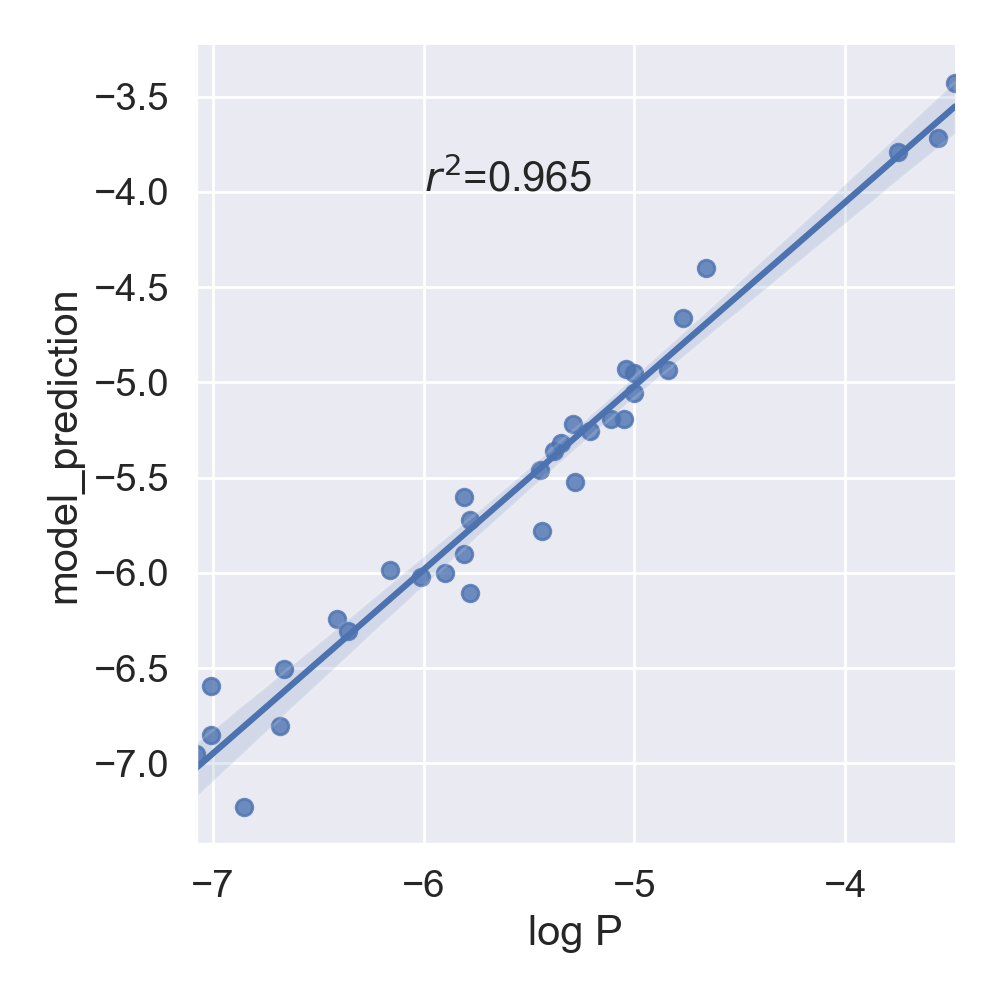

In [64]:
g = sns.lmplot(x="log P", y="model_prediction", data=fit_data)

g.ax.annotate(rf"$r^2$={r2_m:.3f}", xy=(-6, -4))

g.tight_layout()
g.savefig("session3.png", dpi=250)